In [ ]:
from transformers import BertTokenizer, BertModel, BertTokenizerFast, RobertaModel, RobertaTokenizerFast
import torch
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

tokenizer = BertTokenizerFast.from_pretrained("bert-base-uncased")
model = BertModel.from_pretrained("bert-base-uncased")

# sent = 'In phosphotriesterase and physostigmine-treated mice, a 4- and 2-fold higher << sarin >> dose, respectively, was needed to cause a 50% inhibition of brain [[ AChE ]] activity.'
sent = 'In concert with these results, we highlighted that the secretion of pro-inflammatory << cytokine >> and NF-κB activation induced by [[ TCDD ]] can be mediated by elevation of [Ca(2+)]i in HAPI microglial cells.'
seed_word = 'chemistry'
input_chem = tokenizer(seed_word, return_tensors="pt")
output_chem = model(**input_chem)

input_sent = tokenizer(sent, return_tensors="pt")
output_sent = model(**input_sent)

/work/sakter/anaconda3/envs/aang/lib/python3.7/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.bias', 'cls.predictions.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exac

In [ ]:
# output_chem.last_hidden_state[0][1]
encoded_sent = tokenizer.encode_plus(sent, return_tensors="pt")
output_ = output_sent.last_hidden_state.squeeze()

sim = []
word_sim = {}
for idx, word in enumerate(encoded_sent['input_ids']):
    token_ids_word = np.where(np.array(encoded_sent.word_ids()) == idx)
    word_tokens_output = output_[token_ids_word]
    # word_tokens_output = word_tokens_output.mean(dim=0)
    sim.append(torch.cosine_similarity(output_chem.last_hidden_state.squeeze()[1:-1], word_tokens_output).detach().numpy()[0])
    # sim.append(cosine_similarity([output_chem.last_hidden_state[0][1].detach().numpy()], [word_tokens_output.detach().numpy()])[0][0])
    word_sim[word] = sim[-1]

In [ ]:
encoded_sent = tokenizer.encode_plus(sent, return_tensors="pt")
output_ = output_sent.last_hidden_state.squeeze()

sim = []
word_sim = {}
for idx, word in enumerate(encoded_sent['input_ids']):
    word_tokens_output = output_[token_ids_word]
    # word_tokens_output = word_tokens_output.mean(dim=0)
    sim.append(torch.cosine_similarity(output_chem.last_hidden_state.squeeze()[1:-1], word_tokens_output).detach().numpy()[0])
    # sim.append(cosine_similarity([output_chem.last_hidden_state[0][1].detach().numpy()], [word_tokens_output.detach().numpy()])[0][0])
    word_sim[word] = sim[-1]

{tensor(101): array([0.26659238], dtype=float32),
 tensor(1999): array([0.25189248], dtype=float32),
 tensor(4164): array([0.13650912], dtype=float32),
 tensor(2007): array([0.1410418], dtype=float32),
 tensor(2122): array([0.16611074], dtype=float32),
 tensor(3463): array([-0.05272757], dtype=float32),
 tensor(1010): array([0.24367961], dtype=float32),
 tensor(2057): array([0.16001701], dtype=float32),
 tensor(11548): array([0.17875148], dtype=float32),
 tensor(2008): array([0.19589584], dtype=float32),
 tensor(1996): array([0.14386573, 0.19495918], dtype=float32),
 tensor(3595): array([0.16328518], dtype=float32),
 tensor(3258): array([0.10657068], dtype=float32),
 tensor(1997): array([0.11496345], dtype=float32),
 tensor(4013): array([0.14050926], dtype=float32),
 tensor(1011): array([0.09511181], dtype=float32),
 tensor(20187): array([0.12212683], dtype=float32),
 tensor(1026): array([0.12289   , 0.11973758, 0.18972461], dtype=float32),
 tensor(1026): array([0.13242331], dtype=floa

In [244]:
sim = np.array(sim)
sim = np.arccos(sim) / np.pi
sim /= sim.sum()

In [9]:
encoded_sent['input_ids'][0]

tensor(101)

In [ ]:
np.random.choice(np.arange(len(arr)), p=arr, size=int(mask_ratio*len(arr)), replace=False)

In [267]:
# np.random.choice(np.arange(len(sim)), p=sim, size=int(0.15*len(sim)), replace=False)
# output_chem.pooler_output.shape
# output_cytokine.pooler_output.shape
for idx, word in enumerate(sent.split(" ")):
    input_cytokine = tokenizer(word, return_tensors="pt")
    output_cytokine = model(**input_cytokine)
    print(word+' -> chemistry: ', torch.cosine_similarity(output_chem.pooler_output, output_cytokine.pooler_output).detach().numpy()[0])
    # print(word+' -> chemistry: ', torch.cosine_similarity(output_chem.last_hidden_state.squeeze()[1:-1], 
#                                                           output_cytokine.last_hidden_state.squeeze()[1:-1]).detach().numpy()[0])
    
    # print(word+' -> chemistry: ', torch.cosine_similarity(output_chem.last_hidden_state[0][0][None], 
                                                          # output_cytokine.last_hidden_state[0][0][None]).detach().numpy()[0])

In -> chemistry:  0.73156077
concert -> chemistry:  0.87898844
with -> chemistry:  0.64207655
these -> chemistry:  0.59284836
results, -> chemistry:  0.9777651
we -> chemistry:  0.89152473
highlighted -> chemistry:  0.9565176
that -> chemistry:  0.96629876
the -> chemistry:  0.60394984
secretion -> chemistry:  0.83476865
of -> chemistry:  0.7530356
pro-inflammatory -> chemistry:  0.96491736
<< -> chemistry:  0.91706
cytokine -> chemistry:  0.9815494
>> -> chemistry:  0.7909668
and -> chemistry:  0.88205796
NF-κB -> chemistry:  0.8645779
activation -> chemistry:  0.85931265
induced -> chemistry:  0.81914693
by -> chemistry:  0.7653643
[[ -> chemistry:  0.7459818
TCDD -> chemistry:  0.96978515
]] -> chemistry:  0.84205204
can -> chemistry:  0.79442346
be -> chemistry:  0.8243005
mediated -> chemistry:  0.94389534
by -> chemistry:  0.7653643
elevation -> chemistry:  0.872762
of -> chemistry:  0.7530356
[Ca(2+)]i -> chemistry:  0.9702405
in -> chemistry:  0.73156077
HAPI -> chemistry:  0.8

In [151]:
np.array(encoded_sent.word_ids())

array([None, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 10, 11, 12, 13, 14, 15, 16,
       17, 17, 17, 18, 19, 20, 21, 21, 22, 23, 23, 24, 25, 26, 27, 28, 29,
       29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45,
       46, 47, 47, 48, 48, 48, 49, 50, None], dtype=object)

In [143]:
# output_chem.last_hidden_state.squeeze()[1:-1].shape
token_ids_word = np.where(np.array(encoded_sent.word_ids()) == 2)
word_tokens_output = output_[token_ids_word]
word_tokens_output.shape

torch.Size([1, 768])

In [ ]:
torch.cosine_similarity(output_chem.last_hidden_state, output_cytokine.pooler_output).detach().numpy()[0]

In [113]:
cosine_similarity([output_chem.last_hidden_state[0][1].detach().numpy()], [word_tokens_output.detach().numpy()])[0][0]

{'In': 0.2665925,
 'concert': 0.2518924,
 'with': 0.13650915,
 'these': 0.14104173,
 'results,': 0.16611066,
 'we': -0.0527275,
 'highlighted': 0.24367954,
 'that': 0.16001697,
 'the': 0.1787515,
 'secretion': 0.19589587,
 'of': 0.1480662,
 'pro-inflammatory': 0.16328517,
 '<<': 0.10657069,
 'cytokine': 0.11496348,
 '>>': 0.14050922,
 'and': 0.09511185,
 'NF-κB': 0.12212683,
 'activation': 0.17021112,
 'induced': 0.13242325,
 'by': 0.14946297,
 '[[': 0.18214768,
 'TCDD': 0.104534194,
 ']]': 0.105115205,
 'can': 0.09944187,
 'be': 0.15731451,
 'mediated': 0.12850343,
 'elevation': 0.14376499,
 '[Ca(2+)]i': 0.16997217,
 'in': 0.1519298,
 'HAPI': 0.12894878,
 'microglial': 0.13394785,
 'cells.': 0.115573525}

In [222]:
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertModel.from_pretrained('bert-base-uncased')
# sent = "Hello, my dog is cute"
sent = "In concert with these results, we highlighted that the secretion of pro-inflammatory << cytokine >> and NF-κB activation induced by [[ TCDD ]] can be mediated by elevation of [Ca(2+)]i in HAPI microglial cells."
input_ids = torch.tensor(tokenizer.encode(sent)).unsqueeze(0)  # Batch size 1
outputs = model(input_ids)
last_hidden_states = outputs[0]
last_hidden_states = last_hidden_states[0][1:-1]

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.predictions.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.decoder.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [223]:
last_hidden_states.shape

torch.Size([60, 768])

In [230]:
true_tokens = []
true_embs = []

for idx, tok in enumerate(tokens[1:-1]):
    text_tok = ''.join(tokenizer.decode(tok).split(' '))
    if not text_tok.startswith('##'):
        true_tokens.append(text_tok)
        true_embs.append(last_hidden_states[idx])
    else:
        true_tokens[-1] = true_tokens[-1]+text_tok[2:]
        true_embs[-1] = torch.add(true_embs[-1],last_hidden_states[idx])
        
true_embs = torch.stack(true_embs)

In [236]:
for idx, word in enumerate(true_tokens):
    print(word+' -> chemistry: ', torch.cosine_similarity(output_chem.last_hidden_state[0][1:-1], 
                                                          true_embs[idx][None]).detach().numpy()[0])

in -> chemistry:  0.26659256
concert -> chemistry:  0.25189242
with -> chemistry:  0.13650917
these -> chemistry:  0.14104171
results -> chemistry:  0.16611068
, -> chemistry:  -0.05272751
we -> chemistry:  0.24367955
highlighted -> chemistry:  0.16001694
that -> chemistry:  0.1787515
the -> chemistry:  0.19589588
secretion -> chemistry:  0.1854894
of -> chemistry:  0.16328514
pro -> chemistry:  0.10657069
- -> chemistry:  0.1149635
inflammatory -> chemistry:  0.14050922
< -> chemistry:  0.09511183
< -> chemistry:  0.12212684
cytokine -> chemistry:  0.17021114
> -> chemistry:  0.13242324
> -> chemistry:  0.12299916
and -> chemistry:  0.18214767
nf -> chemistry:  0.104534216
- -> chemistry:  0.10511521
κb -> chemistry:  0.09944189
activation -> chemistry:  0.15731452
induced -> chemistry:  0.12850343
by -> chemistry:  0.14946294
[ -> chemistry:  0.143765
[ -> chemistry:  0.14806618
tcdd -> chemistry:  0.1699722
] -> chemistry:  0.1519298
] -> chemistry:  0.1289488
can -> chemistry:  0.1

In [237]:
true_tokens

['in',
 'concert',
 'with',
 'these',
 'results',
 ',',
 'we',
 'highlighted',
 'that',
 'the',
 'secretion',
 'of',
 'pro',
 '-',
 'inflammatory',
 '<',
 '<',
 'cytokine',
 '>',
 '>',
 'and',
 'nf',
 '-',
 'κb',
 'activation',
 'induced',
 'by',
 '[',
 '[',
 'tcdd',
 ']',
 ']',
 'can',
 'be',
 'mediated',
 'by',
 'elevation',
 'of',
 '[',
 'ca',
 '(',
 '2',
 '+',
 ')',
 ']',
 'i',
 'in',
 'hapi',
 'microglial',
 'cells',
 '.']

In [357]:
from transformers import RobertaTokenizer
tokenizer_roberta = RobertaTokenizer.from_pretrained("roberta-base")
tokenizer_roberta_fast = RobertaTokenizerFast.from_pretrained("roberta-base")
tokenizer_bert = BertTokenizerFast.from_pretrained("bert-base-uncased")
model_roberta = RobertaModel.from_pretrained("roberta-base")
model_bert = BertModel.from_pretrained("bert-base-uncased")
sent = "In concert with these results, we highlighted that the secretion of pro-inflammatory << cytokine >> and NF-κB activation induced by [[ TCDD ]] can be mediated by elevation of [Ca(2+)]i in HAPI microglial cells."

Some weights of the model checkpoint at roberta-base were not used when initializing RobertaModel: ['lm_head.dense.weight', 'lm_head.layer_norm.weight', 'lm_head.decoder.weight', 'lm_head.layer_norm.bias', 'lm_head.dense.bias', 'lm_head.bias']
- This IS expected if you are initializing RobertaModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.predictions.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.decoder.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.t

In [264]:
tokens_bert = tokenizer_bert(sent)['input_ids']
for tok in tokens_bert:
    print(tokenizer_bert.decode(tok))

[CLS]
in
concert
with
these
results
,
we
highlighted
that
the
secret
##ion
of
pro
-
inflammatory
<
<
cy
##tok
##ine
>
>
and
n
##f
-
κ
##b
activation
induced
by
[
[
tc
##dd
]
]
can
be
mediated
by
elevation
of
[
ca
(
2
+
)
]
i
in
ha
##pi
micro
##glia
##l
cells
.
[SEP]


In [365]:
# input_chem = tokenizer_roberta('chemistry', return_tensors="pt")
# output_chem = model_roberta(**input_chem)
input_chem = tokenizer_bert('chemistry', return_tensors="pt")
output_chem = model_bert(**input_chem)
        
sim = []
clean_sent = sent.strip('.!').lower()
for idx, word in enumerate(sent.lower().split(" ")):
    # input_cytokine = tokenizer_roberta(word, return_tensors="pt")
    # output_cytokine = model_roberta(**input_cytokine)
    word = word.strip('.,')
    input_cytokine = tokenizer_bert(word, return_tensors="pt")
    output_cytokine = model_bert(**input_cytokine)
    print(word+' -> chemistry: ', torch.cosine_similarity(output_chem.pooler_output, output_cytokine.pooler_output).detach().numpy()[0])
    sim.append(torch.cosine_similarity(output_chem.pooler_output, output_cytokine.pooler_output).detach().numpy()[0])
    # print(word+' -> chemistry: ', torch.cosine_similarity(output_chem.last_hidden_state.mean(dim=1), output_cytokine.last_hidden_state.mean(dim=1)).detach().numpy()[0])

in -> chemistry:  0.73156077
concert -> chemistry:  0.87898844
with -> chemistry:  0.64207655
these -> chemistry:  0.59284836
results -> chemistry:  0.8170194
we -> chemistry:  0.89152473
highlighted -> chemistry:  0.9565176
that -> chemistry:  0.96629876
the -> chemistry:  0.60394984
secretion -> chemistry:  0.83476865
of -> chemistry:  0.7530356
pro-inflammatory -> chemistry:  0.96491736
<< -> chemistry:  0.91706
cytokine -> chemistry:  0.9815494
>> -> chemistry:  0.7909668
and -> chemistry:  0.88205796
nf-κb -> chemistry:  0.8645779
activation -> chemistry:  0.85931265
induced -> chemistry:  0.81914693
by -> chemistry:  0.7653643
[[ -> chemistry:  0.7459818
tcdd -> chemistry:  0.96978515
]] -> chemistry:  0.84205204
can -> chemistry:  0.79442346
be -> chemistry:  0.8243005
mediated -> chemistry:  0.94389534
by -> chemistry:  0.7653643
elevation -> chemistry:  0.872762
of -> chemistry:  0.7530356
[ca(2+)]i -> chemistry:  0.9702405
in -> chemistry:  0.73156077
hapi -> chemistry:  0.89

In [452]:
import random
def get_seed_emb():
    input_chem = tokenizer_bert('chemistry', return_tensors="pt")
    output_chem = model_bert(**input_chem)
    return output_chem

def get_similarity(sent):
    output_chem = get_seed_emb()
    sim = []
    sent = sent.strip('.!')
    for idx, word in enumerate(sent.split(" ")):
        word = word.strip('.,')
        input_cytokine = tokenizer_bert(word, return_tensors="pt")
        output_cytokine = model_bert(**input_cytokine)
        sim.append(torch.cosine_similarity(output_chem.pooler_output, output_cytokine.pooler_output).detach().numpy()[0])
    sim = np.array(sim)
    sim = sim/(1.0+np.exp(-sim))
    sim /= sim.sum()
    K = int(0.15*len(sim))
    indices = np.argpartition(sim,-K)[-K:]
    # sim = (cur_sim+1)/2
    # sim /= sim.sum()
    # order = sim.argsort()
    # ranks = order.argsort()+1
    # temp = ranks/(1.0+np.exp(-ranks))
    # temp /= temp.sum()
    return sim, indices #np.random.choice(np.arange(len(sim)), size=int(0.15*len(sim)), replace=False, p=temp)

sim, indices = get_similarity(sent)

In [454]:
sim, sim[indices]

(array([0.02503623, 0.03148359, 0.02132532, 0.0193536 , 0.02872522,
        0.03204976, 0.03502716, 0.0354812 , 0.0197938 , 0.02950831,
        0.02595027, 0.03541699, 0.03321123, 0.03619216, 0.02758615,
        0.03162197, 0.03083612, 0.03060045, 0.02881878, 0.026479  ,
        0.02564906, 0.03564341, 0.02983129, 0.02773656, 0.02904577,
        0.0344435 , 0.026479  , 0.0312034 , 0.02595027, 0.03566461,
        0.02503623, 0.03208334, 0.02445234, 0.03228386], dtype=float32),
 array([0.03541699, 0.0354812 , 0.03564341, 0.03619216, 0.03566461],
       dtype=float32))

In [713]:
def get_seed_emb():
    input_chem = tokenizer_bert('chemistry', return_tensors="pt")
    output_chem = model_bert(**input_chem)
    return output_chem

def get_similarity(sent):
    output_chem = get_seed_emb()
    clean_sent = [word.strip('.,') for word in sent.lower().strip('.!').split(" ")]
    input_cytokine = tokenizer_bert.batch_encode_plus(clean_sent, add_special_tokens=True, return_tensors="pt", padding=True, truncation=True)
    output_cytokine = model_bert(**input_cytokine)
    sim = []
    
    for idx in range(output_cytokine.pooler_output.shape[0]):
        sim.append(torch.cosine_similarity(output_chem.pooler_output, output_cytokine.pooler_output[idx][None]).detach().numpy()[0])
    sim = np.array(sim)
    sim = np.divide(sim, (1.0+np.exp(-sim)))
    sim /= sim.sum()
    K = int(0.25*len(sim))
    # indices = np.argpartition(sim,-K)[-K:]
    # indices = sorted(indices, reverse=True)
    indices = (-sim).argsort()[:K]
    words = sent.split(" ")
    sim_word = [words[idx] for idx in indices]
    return sim, sim_word, indices#sim_word, indices

def get_masked_indices(sent, tokenized_sent):
    sim, sim_word, indices = get_similarity(sent)
    idx = 1
    words = [x for x in sent.split(' ')]
    enc = tokenizer_roberta.batch_encode_plus(words, add_special_tokens=False, add_prefix_space=True)
    desired_output = []
    masked_tok_indices = []
    masked_tok_dict = {}
    total_len = 0
    for w, token in zip(words, enc.input_ids):
        tokenoutput = []
        tokenoutput.extend(range(idx, idx+len(token)))
        idx += len(token)
        total_len += len(token)
        if w in sim_word:
            masked_tok_dict[w] = tokenoutput
    for w in sim_word:
        masked_tok_indices.extend(masked_tok_dict[w])
    masked_tok_indices = np.array(masked_tok_indices)[np.random.choice(len(masked_tok_indices), size=int(total_len*0.15), replace=False)]#maksed_tok_indices[:int(total_len*0.15)]
    mask = torch.full(tokenized_sent.shape, False)
    mask[masked_tok_indices] = True
    return mask
    # return maksed_tok_indices#, sim, enc.input_ids, sim_word

sents = ['In concert with these results, we highlighted that the secretion of pro-inflammatory << cytokine >> and NF-κB activation induced by [[ TCDD ]] can be mediated by elevation of [Ca(2+)]i in HAPI microglial cells.',
         'In phosphotriesterase and physostigmine-treated mice, a 4- and 2-fold higher << sarin >> dose, respectively, was needed to cause a 50% inhibition of brain [[ AChE ]] activity.']
# maksed_tok_indicess, sim, enc_input_ids, sim_word = get_masked_indices(sents[0])


In [730]:
# maksed_tok_indicess
from torch.nn.utils.rnn import pad_sequence as torch_pad_sequence
def pad_sequence(all_egs, pad_token_id):
	if pad_token_id is None:
		return torch_pad_sequence(all_egs, batch_first=True)
	else:
		return torch_pad_sequence(all_egs, batch_first=True, padding_value=pad_token_id)
    
out = tokenizer_roberta.batch_encode_plus(sents, add_special_tokens=True, truncation=True, 
                                          max_length=500, return_special_tokens_mask=True)
all_egs = [torch.tensor(x) for x in out["input_ids"]]
out = pad_sequence(all_egs, tokenizer_roberta.pad_token_id)
maksed_tok_indicess = torch.stack([get_masked_indices(x, out[idx]) for idx, x in enumerate(sents)])

probability_matrix = torch.full(out.shape, False)
probability_matrix[maksed_tok_indicess] = True
# probability_matrix, maksed_tok_indicess
# torch.nested.nested_tensor(maksed_tok_indicess)
# maksed_tok_indicess.
probability_matrix == maksed_tok_indicess

tensor([[True, True, True, True, True, True, True, True, True, True, True, True,
         True, True, True, True, True, True, True, True, True, True, True, True,
         True, True, True, True, True, True, True, True, True, True, True, True,
         True, True, True, True, True, True, True, True, True, True, True, True,
         True, True, True, True, True, True, True, True],
        [True, True, True, True, True, True, True, True, True, True, True, True,
         True, True, True, True, True, True, True, True, True, True, True, True,
         True, True, True, True, True, True, True, True, True, True, True, True,
         True, True, True, True, True, True, True, True, True, True, True, True,
         True, True, True, True, True, True, True, True]])

In [726]:
torch.stack(maksed_tok_indicess).shape

torch.Size([2, 56])

In [700]:
probability_matrix = torch.full(input_chem.input_ids[0].shape, False)
probability_matrix[10000] = False

IndexError: index 10000 is out of bounds for dimension 0 with size 56

In [680]:
sim_word, sim

(['cytokine',
  '[Ca(2+)]i',
  'TCDD',
  'that',
  'pro-inflammatory',
  'highlighted',
  'mediated',
  '<<'],
 array([0.02503624, 0.03148359, 0.02132531, 0.0193536 , 0.02872521,
        0.03204975, 0.03502716, 0.03548121, 0.0197938 , 0.0295083 ,
        0.02595027, 0.03541698, 0.03321123, 0.03619216, 0.02758614,
        0.03162198, 0.03083612, 0.03060045, 0.02881879, 0.02647901,
        0.02564906, 0.03564341, 0.0298313 , 0.02773657, 0.02904578,
        0.0344435 , 0.02647901, 0.0312034 , 0.02595027, 0.0356646 ,
        0.02503624, 0.03208334, 0.02445235, 0.03228386], dtype=float32))

In [675]:
# sim_word, sim
proba_mat = torch.full(input_chem.input_ids[0].shape, False)
proba_mat[maksed_tok_indicess] = True
proba_mat

tensor([False, False, False, False, False, False, False, False, False, False,
        False, False, False,  True,  True, False, False, False,  True, False,
        False, False, False, False, False, False, False, False, False, False,
         True, False, False, False, False, False,  True, False, False, False,
        False,  True,  True,  True, False, False, False, False, False, False,
        False, False, False, False, False, False])

In [673]:
input_chem = tokenizer_roberta(sent, return_tensors="pt")
input_chem.input_ids[0][maksed_tok_indicess] = 0
tokenizer_roberta.decode(input_chem['input_ids'][0][1:-1])

'In concert with these results, we highlighted that the secretion of<s><s>inflammatory << cytok<s> >> and NF-κB activation induced by [[ T<s>D ]] can be<s> by elevation of [<s><s><s>+)]i in HAPI microglial cells.'

In [684]:
# sent
a = np.array([0.1,0.2,0.3])
1.0/(1.0+np.exp(-sim))

array([0.5062587 , 0.50787026, 0.50533116, 0.5048383 , 0.5071808 ,
       0.50801176, 0.5087559 , 0.5088694 , 0.5049483 , 0.50737655,
       0.5064872 , 0.5088533 , 0.50830203, 0.5090471 , 0.5068961 ,
       0.5079048 , 0.50770843, 0.50764954, 0.5072042 , 0.5066194 ,
       0.5064119 , 0.50890994, 0.5074573 , 0.5069337 , 0.507261  ,
       0.50861   , 0.5066194 , 0.5078002 , 0.5064872 , 0.5089152 ,
       0.5062587 , 0.50802016, 0.50611275, 0.5080703 ], dtype=float32)

In [608]:
# clean_sent = [word.strip('.,') for word in sent.strip('.!').split()]
input_chem = tokenizer_roberta(sent, return_tensors="pt")
# for tok in input_chem['input_ids'][0][1:-1]:
#     print(tokenizer_roberta.decode(tok))
# sent = "Hello, my dog is cute"
mult_sent = ["In concert with these results, we highlighted that the secretion of pro-inflammatory << cytokine >> and NF-κB activation induced by [[ TCDD ]] can be mediated by elevation of [Ca(2+)]i in HAPI microglial cells.",
            "Hello, my dog is cute"]
sim, sim_word, indices = get_similarity(sent)
idx = 1
# mult_words = [[x for x in sent.split(' ')] for sent in mult_sent]
words = [x for x in sent.split(' ')]
enc = tokenizer_roberta.batch_encode_plus(words, add_special_tokens=False, add_prefix_space=True)
desired_output = []
maksed_tok_indices = []
for w, token in zip(words, enc.input_ids):
    tokenoutput = []
    tokenoutput.extend(range(idx, idx+len(token)))
    idx += len(token)
    if w in sim_word:
        maksed_tok_indices.extend(tokenoutput)

In [583]:
mult_sent = ["In concert with these results, we highlighted that the secretion of pro-inflammatory << cytokine >> and NF-κB activation induced by [[ TCDD ]] can be mediated by elevation of [Ca(2+)]i in HAPI microglial cells.",
            "Hello, my dog is cute"]
mult_words = [[x for x in sent.split(' ')] for sent in mult_sent]
enc = tokenizer_roberta.batch_encode_plus(mult_words, add_special_tokens=False, add_prefix_space=True)

ValueError: too many values to unpack (expected 2)

In [584]:
mult_words

[['In',
  'concert',
  'with',
  'these',
  'results,',
  'we',
  'highlighted',
  'that',
  'the',
  'secretion',
  'of',
  'pro-inflammatory',
  '<<',
  'cytokine',
  '>>',
  'and',
  'NF-κB',
  'activation',
  'induced',
  'by',
  '[[',
  'TCDD',
  ']]',
  'can',
  'be',
  'mediated',
  'by',
  'elevation',
  'of',
  '[Ca(2+)]i',
  'in',
  'HAPI',
  'microglial',
  'cells.'],
 ['Hello,', 'my', 'dog', 'is', 'cute']]

In [614]:
maksed_tok_indices
# range(idx, idx+len(token))

[8,
 9,
 13,
 14,
 15,
 16,
 17,
 18,
 29,
 30,
 31,
 36,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 48,
 49,
 53,
 54]

In [613]:
maksed_tok_indicess

[48, 49, 53, 54, 29, 30, 31, 36]

In [568]:
tokenizer_roberta.decode(6)

','

In [629]:
input_chem = tokenizer_roberta(sent, return_tensors="pt")
input_chem.input_ids[0][maksed_tok_indices] = 0
tokenizer_roberta.decode(input_chem['input_ids'][0][1:-1])

'In concert with these results, we<s><s> the secretion of<s><s><s><s><s><s> >> and NF-κB activation induced by [[<s><s><s> ]] can be<s> by elevation of<s><s><s><s><s><s><s> in<s><s> microglial<s><s>'

In [631]:
maksed_tok_indicess

[17, 18, 40, 41, 42, 43, 44, 45]

'In concert with these results, we highlighted<s> the secretion of pro<s>inflammatory<s><s><s> >> and NF-κB activation induced by [[ T<s><s> ]] can be mediated by elevation of [Ca(2<s>)]i in HAPI microglial cells.'

In [617]:
sent, sim

('In concert with these results, we highlighted that the secretion of pro-inflammatory << cytokine >> and NF-κB activation induced by [[ TCDD ]] can be mediated by elevation of [Ca(2+)]i in HAPI microglial cells.',
 array([0.02503624, 0.03148359, 0.02132531, 0.0193536 , 0.02872521,
        0.03204975, 0.03502716, 0.03548121, 0.0197938 , 0.0295083 ,
        0.02595027, 0.03541698, 0.03321123, 0.03619216, 0.02758614,
        0.03162198, 0.03083612, 0.03060045, 0.02881879, 0.02647901,
        0.02564906, 0.03564341, 0.0298313 , 0.02773657, 0.02904578,
        0.0344435 , 0.02647901, 0.0312034 , 0.02595027, 0.0356646 ,
        0.02503624, 0.03208334, 0.02445235, 0.03228386], dtype=float32))

In [544]:
# tokenizer_roberta.convert_ids_to_tokens(input_chem['input_ids'][0][1:-1])
idx = 1

enc =[(x, tokenizer_roberta.encode(x, add_special_tokens=False, add_prefix_space=True)) for x in sent.split()]

desired_output = []

for w, token in enc:
    tokenoutput = []
    for ids in token:
        tokenoutput.append(idx)
        idx +=1
    desired_output.append((w, tokenoutput))

print(desired_output, len(desired_output))

# desired_output = []
# encoded = tokenizer_roberta_fast(sent)
# for word_id in encoded.word_ids():
#     if word_id is not None:
#         start, end = encoded.word_to_tokens(word_id)
#         if start == end - 1:
#             tokens = [start]
#         else:
#             tokens = [start, end-1]
#         if len(desired_output) == 0 or desired_output[-1] != tokens:
#             desired_output.append(tokens)
            
# print(desired_output, len(desired_output))
# tokenizer_roberta.convert_tokens_to_ids(sent)

[('In', [1]), ('concert', [2]), ('with', [3]), ('these', [4]), ('results,', [5, 6]), ('we', [7]), ('highlighted', [8]), ('that', [9]), ('the', [10]), ('secretion', [11]), ('of', [12]), ('pro-inflammatory', [13, 14, 15]), ('<<', [16]), ('cytokine', [17, 18]), ('>>', [19]), ('and', [20]), ('NF-κB', [21, 22, 23, 24]), ('activation', [25]), ('induced', [26]), ('by', [27]), ('[[', [28]), ('TCDD', [29, 30, 31]), (']]', [32, 33]), ('can', [34]), ('be', [35]), ('mediated', [36]), ('by', [37]), ('elevation', [38]), ('of', [39]), ('[Ca(2+)]i', [40, 41, 42, 43, 44, 45, 46]), ('in', [47]), ('HAPI', [48, 49]), ('microglial', [50, 51, 52]), ('cells.', [53, 54])] 34


In [600]:
input_chem

{'input_ids': tensor([[    0,  1121,  4192,    19,   209,   775,     6,    52,  6263,     0,
             5, 46886,     9,     0,     0,     0, 48188,     0,     0,  8488,
             8, 33861,    12, 48103,   387, 29997, 26914,    30, 48395,     0,
             0,     0, 27779,   742,    64,    28, 43219,    30, 25361,     9,
             0,     0,     0,     0,     0,     0,     0,    11,   289, 40104,
          5177,  7210,  2617,  4590,     4,     2]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1, 1]])}

In [501]:
order = sim.argsort()
ranks = order.argsort()+1
ranks

array([ 5, 22,  3,  1, 14, 24, 29, 31,  2, 17,  9, 30, 27, 34, 12, 23, 20,
       19, 15, 11,  7, 32, 18, 13, 16, 28, 10, 21,  8, 33,  6, 25,  4, 26])

In ->  0.025036242
concert ->  0.031483594
with ->  0.021325313
these ->  0.019353596
results, ->  0.028725207
we ->  0.03204975
highlighted ->  0.03502716
that ->  0.03548121
the ->  0.019793795
secretion ->  0.029508302
of ->  0.025950268
pro-inflammatory ->  0.03541698
<< ->  0.033211228
cytokine ->  0.036192164
>> ->  0.027586136
and ->  0.03162198
NF-κB ->  0.030836122
activation ->  0.030600447
induced ->  0.028818786
by ->  0.026479013
[[ ->  0.025649063
TCDD ->  0.035643414
]] ->  0.029831296
can ->  0.027736565
be ->  0.029045783
mediated ->  0.034443498
by ->  0.026479013
elevation ->  0.031203397
of ->  0.025950268
[Ca(2+)]i ->  0.035664603
in ->  0.025036242
HAPI ->  0.032083336
microglial ->  0.024452353
cells. ->  0.03228386


In [492]:
input_cytokine.input_ids.shape

torch.Size([34, 10])

In [499]:
output_cytokine.pooler_output[0][None].shape

torch.Size([1, 768])

In [424]:
order = sim.argsort()
ranks = order.argsort()+1
ranks

array([ 5, 22,  3,  1, 14, 24, 29, 31,  2, 17,  9, 30, 27, 34, 12, 23, 20,
       19, 15, 11,  7, 32, 18, 13, 16, 28, 10, 21,  8, 33,  6, 25,  4, 26])

In [423]:
sim

array([0.02782355, 0.03019249, 0.02638568, 0.02559466, 0.02919674,
       0.03039393, 0.03143827, 0.03159544, 0.02577304, 0.02948195,
       0.02816862, 0.03157324, 0.03080424, 0.03184049, 0.02877812,
       0.03024181, 0.02996094, 0.02987633, 0.02923093, 0.02836672,
       0.02805528, 0.03165146, 0.02959898, 0.02883366, 0.02931374,
       0.03123545, 0.02836672, 0.03009244, 0.02816862, 0.03165877,
       0.02782355, 0.03040585, 0.02760134, 0.03047694], dtype=float32)

In [437]:
temp = ranks/(1.0+np.exp(-ranks))
temp /= temp.sum()
# order_temp = temp.argsort()
# ranks_temp = order_temp.argsort()+1
# ranks_temp
temp

array([0.00835809, 0.03702337, 0.00480921, 0.00123028, 0.02356031,
       0.04038914, 0.04880354, 0.0521693 , 0.00296455, 0.02860897,
       0.01514406, 0.05048642, 0.04543778, 0.05721794, 0.02019444,
       0.03870626, 0.03365761, 0.03197473, 0.0252432 , 0.01851138,
       0.01176943, 0.05385218, 0.03029185, 0.0218774 , 0.02692609,
       0.04712066, 0.01682804, 0.03534049, 0.01345853, 0.05553506,
       0.01007232, 0.04207202, 0.00661045, 0.0437549 ])

In [426]:
ranks_temp == ranks

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True])

In [420]:
np.log(1+np.exp(sim))

array([0.7071557 , 0.7083574 , 0.706427  , 0.7060264 , 0.70785207,
       0.70845956, 0.7089898 , 0.7090696 , 0.70611674, 0.7079969 ,
       0.7073307 , 0.70905834, 0.70866793, 0.7091942 , 0.7076398 ,
       0.7083823 , 0.7082399 , 0.7081969 , 0.70786947, 0.7074311 ,
       0.7072731 , 0.7090981 , 0.7080562 , 0.707668  , 0.7079114 ,
       0.7088868 , 0.7074311 , 0.70830655, 0.7073307 , 0.70910174,
       0.7071557 , 0.70846564, 0.7070431 , 0.7085017 ], dtype=float32)

In [337]:
input_chem = tokenizer_roberta_fast('chemistry', return_tensors="pt")
output_chem = model_roberta(**input_chem)

encoded_sent = tokenizer_roberta_fast(sent, return_tensors="pt")
output_sent = model_roberta(**encoded_sent)
output_ = output_sent.last_hidden_state.squeeze()

sim = []
word_sim = {}
for idx, word in enumerate(encoded_sent['input_ids'][0][1:-1]):#(sent.split(' ')):
    token_ids_word = np.where(np.array(encoded_sent.word_ids()) == idx)
    word_tokens_output = output_[token_ids_word]
    # word_tokens_output = word_tokens_output.mean(dim=0)
    try:
        sim.append(torch.cosine_similarity(output_chem.last_hidden_state.mean(dim=1), word_tokens_output).detach().numpy()[0])
    except:
        print(token_ids_word, word_tokens_output)
        raise
    # sim.append(cosine_similarity([output_chem.last_hidden_state[0][1].detach().numpy()], [word_tokens_output.detach().numpy()])[0][0])
    word_sim[word] = sim[-1]

(array([], dtype=int64),) tensor([], size=(0, 768), grad_fn=<IndexBackward0>)


IndexError: index 0 is out of bounds for axis 0 with size 0

In [330]:
encoded_sent['input_ids']

tensor([[    0,  1121,  4192,    19,   209,   775,     6,    52,  6263,    14,
             5, 46886,     9,  1759,    12, 33824, 48188, 45837,   833,  8488,
             8, 33861,    12, 48103,   387, 29997, 26914,    30, 48395,   255,
         11579,   495, 27779,   742,    64,    28, 43219,    30, 25361,     9,
           646, 38593,  1640,   176,  2744, 46077,   118,    11,   289, 40104,
          5177,  7210,  2617,  4590,     4,     2]])

In [293]:
output_chem.last_hidden_state.mean(dim=1)

torch.Size([1, 768])

## Analysis

In [4]:
import tqdm
from transformers import BertTokenizer, BertModel, BertTokenizerFast, RobertaModel, RobertaTokenizerFast
import torch
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

tokenizer_bert = BertTokenizerFast.from_pretrained("bert-base-uncased")
model_bert = BertModel.from_pretrained("bert-base-uncased")
tokenizer_roberta_fast = RobertaTokenizerFast.from_pretrained("roberta-base", add_prefix_space=True)
model_roberta = RobertaModel.from_pretrained("roberta-base")

def get_seed_emb(data_type):
    if data_type == 'chem':
        seeds = ['inos','adrenoceptor','inhibit','tcdd','akt','agonist', 'vegf', 'caspase', 'inhibiting', 'ec','cyclin', 'microm', 'antagonist', 'potency', 'antagonists', 'inhibitory', 'potent', 'inhibits', 'tyrosine', 'synthase']
    else:
        seeds = ['charniak', 'coreference', 'treebank', 'parsers', 'grammars', 'parse', 'syntactic', 'linguistic', 'lexical', 'roth', 'och', 'parser', 'parsing', 'extraction', 'chen', 'sentences', 'phrase', 'semantic', 'sentence', 'dialogue']
    input_chem = tokenizer_bert.batch_encode_plus(seeds, add_special_tokens=True, return_tensors="pt", padding=True, truncation=True)
    # input_chem = tokenizer_bert.batch_encode_plus(['language', 'text', 'model', 'information', 'grammar', 'lexical'], add_special_tokens=True, return_tensors="pt", padding=True, truncation=True)
    output_chem = model_bert(**input_chem)
    return output_chem

emb_chem = get_seed_emb('chem')

def get_similarity(sents, data_type):
    if data_type == 'chem':
        seeds = ['inos','adrenoceptor','inhibit','tcdd','akt','agonist', 'vegf', 'caspase', 'inhibiting', 'ec','cyclin', 'microm', 'antagonist', 'potency', 'antagonists', 'inhibitory', 'potent', 'inhibits', 'tyrosine', 'synthase']
    else:
        seeds = ['charniak', 'coreference', 'treebank', 'parsers', 'grammars', 'parse', 'syntactic', 'linguistic', 'lexical', 'roth', 'och', 'parser', 'parsing', 'extraction', 'chen', 'sentences', 'phrase', 'semantic', 'sentence', 'dialogue']
        
    clean_sent = [word.strip('.,') for sent in sents for word in sent.lower().strip('.!').split(" ")]
    input_cytokine = tokenizer_bert.batch_encode_plus(clean_sent, add_special_tokens=True, return_tensors="pt", padding=True, truncation=True)
    output_cytokine = model_bert(**input_cytokine)
    sim = []
    which_seed = []
    for idx in tqdm.tqdm(range(output_cytokine.pooler_output.shape[0])):
        if emb_chem.pooler_output.shape[0] > 1:
            temp_sim = -1000.00
            tseed = ''
            for sidx in range(emb_chem.pooler_output.shape[0]):
                tsim = torch.cosine_similarity(emb_chem.pooler_output[sidx][None], output_cytokine.pooler_output[idx][None]).detach().numpy()[0]
                if temp_sim < tsim:
                    temp_sim = tsim
                    tseed = seeds[sidx]
            sim.append(temp_sim)
            which_seed.append(tseed)
        else:
            sim.append(torch.cosine_similarity(emb_chem.pooler_output, output_cytokine.pooler_output[idx][None]).detach().numpy()[0])
    sim = np.array(sim)
    sim = np.divide(sim, (1.0+np.exp(-sim)))
    sim /= sim.sum()
    K = int(0.50*len(sim)) #int(0.15*len(sim))
    #indices = np.argpartition(sim,-K)[-K:]
    indices = (-sim).argsort()[:K]
    words = []
    for sent in sents:
        words.extend(sent.split(" "))
    sim_word = [words[idx] for idx in indices]
    return sim_word, which_seed

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.decoder.weight', 'cls.seq_relationship.weight', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of the model checkpoint at roberta-base were not used when initializing RobertaModel: ['lm_head.decoder.weight', 'lm_head.dense.bias', 'lm_hea

In [5]:
import json
from collections import Counter, defaultdict
# docs = json.load(open('/work/sakter/AANG/datasets/chemprot/train.jsonl', 'r'))

with open('/work/sakter/AANG/datasets/chemprot/train.txt', encoding="utf-8") as f:
    token_counter = Counter()
    lines = []
    all_tokens = []
    capitalizations = []
    for line in f.readlines():
        line = line.strip()
        if len(line) < 2: # Remove all single letter or empty lines
            continue
        lines.append(line)

In [4]:
all_sim_word = []
import tqdm

n_lines = 0
for sent in tqdm.tqdm(lines):
    n_lines += 1
    sim_word = get_similarity(sent)
    all_sim_word.extend(sim_word[:3])
    if n_lines == 500:
        break

  0%|          | 0/4169 [00:00<?, ?it/s]


TypeError: get_similarity() missing 1 required positional argument: 'data_type'

In [ ]:
all_sim_word = []
all_seed_word = []
for i in range(0, len(lines), 20):
    # get the sublist of the next `n` elements
    sublist = lines[i:i+20]
    # do something with the sublist
    sim_word, which_seed = get_similarity(sublist, 'chem')
    all_sim_word.extend(sim_word)
    all_seed_word.extend(which_seed)

100%|██████████| 578/578 [00:00<00:00, 822.51it/s]


In [ ]:
x = Counter(all_sim_word)
x.most_common()

In [11]:
x = dict(x)

In [6]:
import json
with open('data_chemprot.json', 'w') as fp:
    json.dump(x, fp)

In [65]:
import json
with open('data_chemprot.json') as fp:
    data_chemprot = json.load(fp)

with open('data_citation_intent.json') as fp:
    data_citation_intent = json.load(fp)

from collections import Counter, defaultdict
x = Counter(data_chemprot)
# x.most_common()

stopwords = ['of','a','to','in','is','for','as','on','by','are','with','we', 'has', 'or', 'from', 'this', 'used', 'In', 'We', 
             'also', 'e.g.', 'at', 'A', 'some', 'which', '2001', '2000', '1998', '1999', 'have', '2002', '2005', '2004', '2003', '2007','work',
            '[', 'use', '2008', '2006', '2009','This', 'more', 'most','their', '1997', '1996', '1993', '2010','1988', 'For', 'and', '<<',
            ']]', ']],', ']].', '<', '<', ']', ']', 'To', 'that', '3', 'its']
for item in stopwords:
    if item in x:
        del x[item]

In [66]:
new_x_x = []
new_x_y = []
for w, v in x.most_common():
    new_x_x.append(w)
    new_x_y.append(v)

In [67]:
y = Counter(data_citation_intent)
for item in stopwords:
    if item in y:
        del y[item]

In [68]:
# y.most_common()
new_y_x = []
new_y_y = []
for w, v in y.most_common():
    new_y_x.append(w)
    new_y_y.append(v)

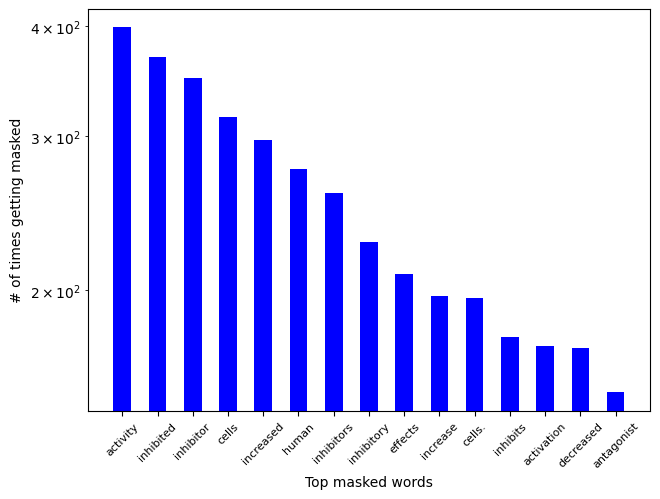

In [69]:
# x.most_common()
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


width = 0.5

plt.bar(new_x_x[:15], new_x_y[:15], width, color='b')
plt.xticks(rotation=45, fontsize=8)
plt.xlabel('Top masked words', fontsize=10)
plt.ylabel('# of times getting masked', fontsize=10)
plt.yscale('log')
plt.tight_layout(pad=0)
plt.savefig('hist_chemprot.png', bbox_inches='tight', dpi=300)
plt.show()

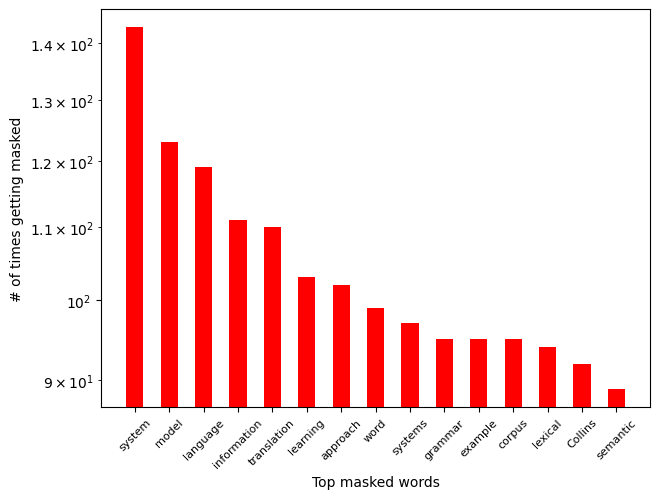

In [70]:
# x.most_common()
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

width = 0.5

plt.bar(new_y_x[:15], new_y_y[:15], width, color='r')
plt.xticks(rotation=45, fontsize=8)
plt.xlabel('Top masked words', fontsize=10)
plt.ylabel('# of times getting masked', fontsize=10)
plt.yscale('log')
plt.tight_layout(pad=0)
plt.savefig('hist_citation_intent.png', bbox_inches='tight', dpi=300)
plt.show()

<AxesSubplot:ylabel='Count'>

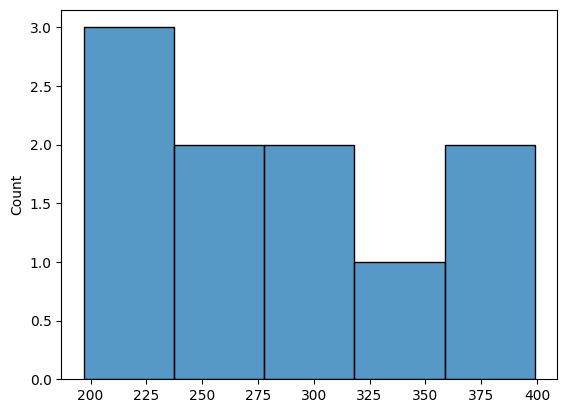

In [32]:
sns.histplot(data=dict(zip(new_x_x[:10], new_x_y[:10])))

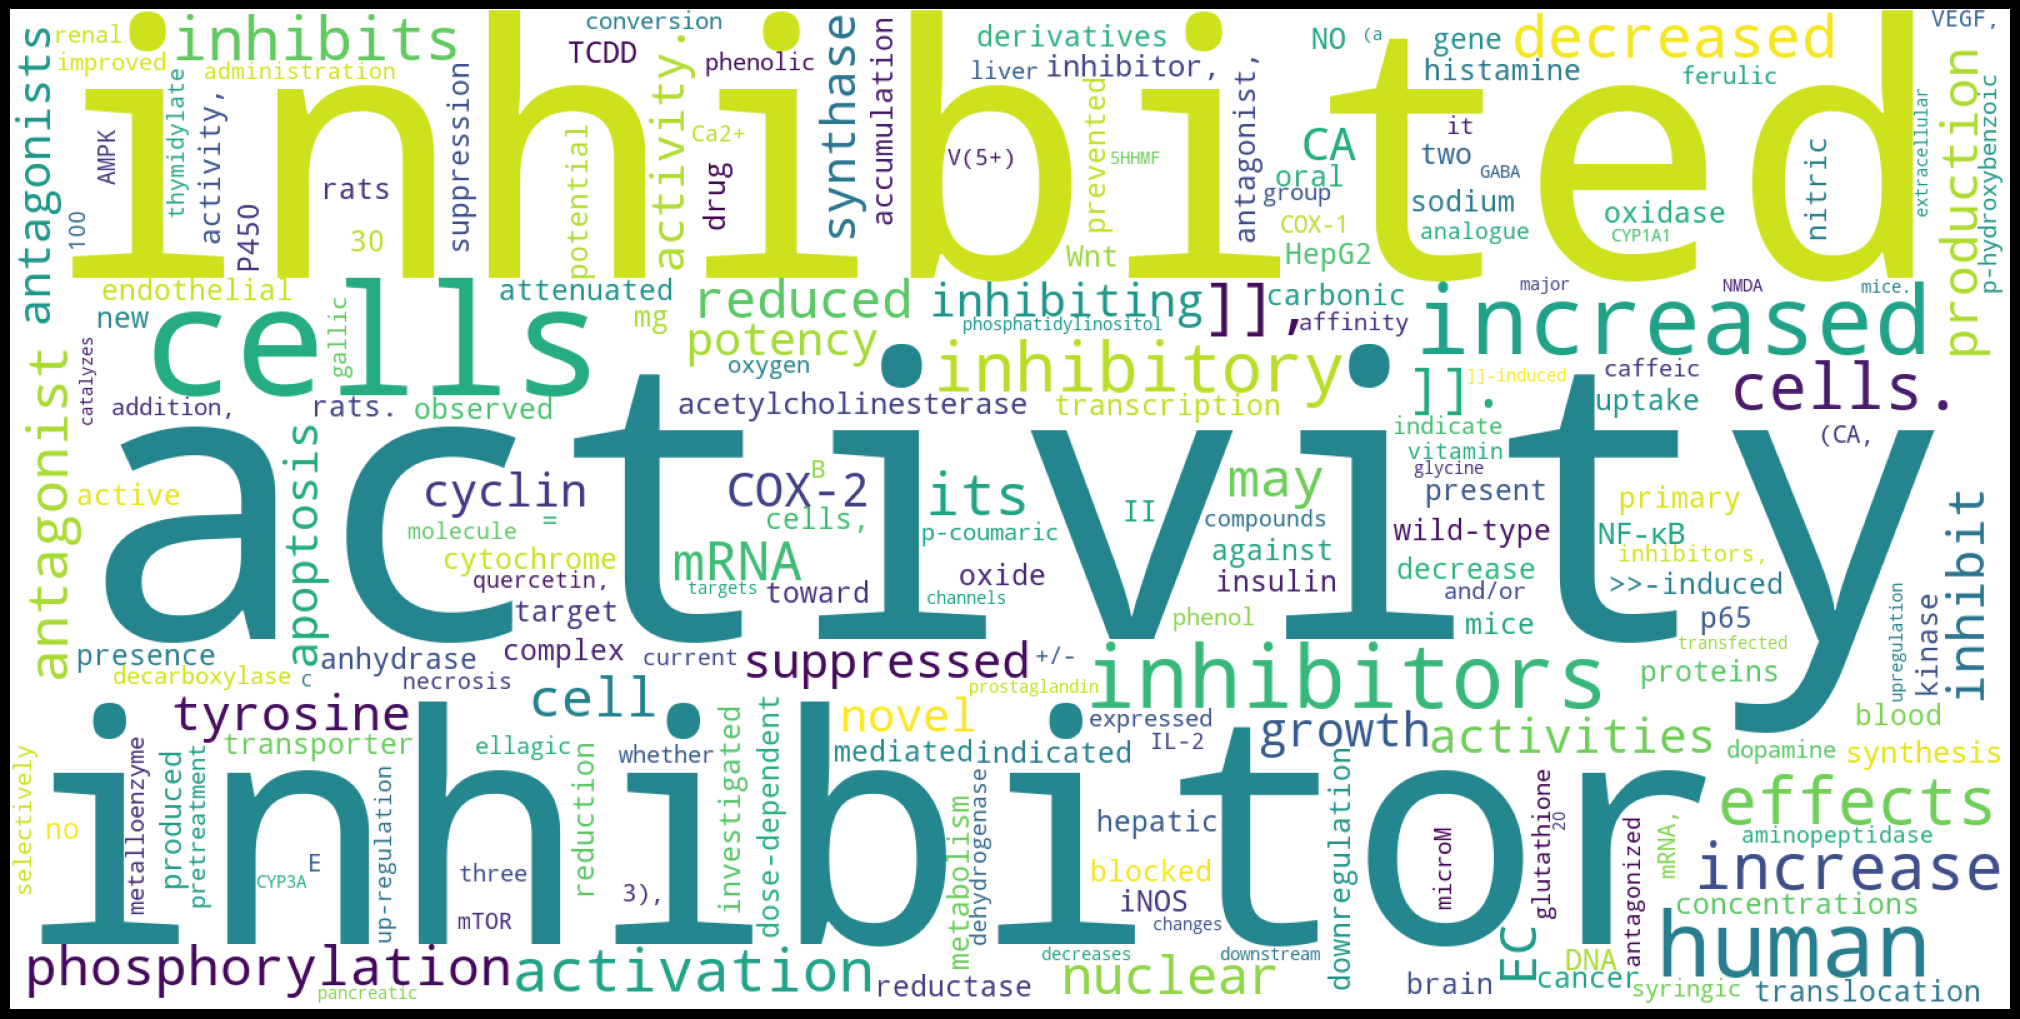

In [16]:
from wordcloud import WordCloud
from wordcloud import STOPWORDS
import matplotlib.pyplot as plt


wordcloud = WordCloud(stopwords = STOPWORDS, width=1600, height=800, background_color = 'white')
# Open a plot of the generated image.
wordcloud.generate_from_frequencies(frequencies=x)
plt.figure( figsize=(20,10), facecolor='k')
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.savefig('wordcloud_chemprot.png', facecolor='k', bbox_inches='tight')
plt.show()

In [24]:
import json
    
with open('/work/sakter/AANG/datasets/chemprot/test.jsonl') as f:
    data = [json.loads(line) for line in f]
    
import random
random_data = random.sample(data, k=1000)

def get_similarity(sents):
    clean_sent = [word.strip('.,') for word in sents]
    input_cytokine = tokenizer_bert.batch_encode_plus(clean_sent, add_special_tokens=True, return_tensors="pt", padding=True, truncation=True)
    output_cytokine = model_bert(**input_cytokine)
    sim = []
    for idx in tqdm.tqdm(range(output_cytokine.pooler_output.shape[0])):
        if emb_chem.pooler_output.shape[0] > 1:
            temp_sim = -1000.00
            for sidx in range(emb_chem.pooler_output.shape[0]):
                tsim = torch.cosine_similarity(emb_chem.pooler_output[sidx][None], output_cytokine.pooler_output[idx][None]).detach().numpy()[0]
                if temp_sim < tsim:
                    temp_sim = tsim
            sim.append(temp_sim)
        else:
            sim.append(torch.cosine_similarity(emb_chem.pooler_output, output_cytokine.pooler_output[idx][None]).detach().numpy()[0])
    sim = np.array(sim)
    sim = np.divide(sim, (1.0+np.exp(-sim)))
    sim /= sim.sum()
    K = int(len(sim)) #int(0.15*len(sim))
    #indices = np.argpartition(sim,-K)[-K:]
    indices = (-sim).argsort()[:K]
    words = []
    # for sent in sents:
    #     words.extend(sent.split(" "))
    words = [w for w in sents]
    sim_word = [words[idx] for idx in indices]
    return sim_word

all_labels = []

for r in data:#random_data:
    all_labels.append(r['label'])
    
# get_similarity(all_labels)

In [29]:
dict(Counter(all_labels)).values()

dict_values([293, 340, 1255, 334, 182, 191, 72, 292, 453, 41, 4, 12])

In [52]:
import pandas as pd

cat_t50 = pd.DataFrame()
dog_t50 = pd.DataFrame()

cat_t50['label'] = ['ANTAGONIST', 'INDIRECT-DOWNREGULATOR', 'INHIBITOR', 'INDIRECT-UPREGULATOR', 'AGONIST', 'PRODUCT-OF', 'DOWNREGULATOR', 
                   'ACTIVATOR', 'SUBSTRATE', 'UPREGULATOR', 'AGONIST-ACTIVATOR', 'AGONIST-INHIBITOR']
dog_t50['label'] = ['ANTAGONIST', 'INDIRECT-DOWNREGULATOR', 'INHIBITOR', 'INDIRECT-UPREGULATOR', 'AGONIST', 'PRODUCT-OF', 'DOWNREGULATOR', 
                   'ACTIVATOR', 'SUBSTRATE', 'UPREGULATOR', 'AGONIST-ACTIVATOR', 'AGONIST-INHIBITOR']
#[293, 340, 1255, 334, 182, 191, 72, 292, 453, 41, 4, 12]
cat_t50['count'] = [132, 203, 766, 191, 180, 105, 36, 256, 413, 23, 1, 4]
dog_t50['count'] = [196, 234, 1200, 256, 181, 134, 47, 267, 422, 12, 4, 5]

In [53]:
dog_t50['count']/cat_t50['count']

0     1.484848
1     1.152709
2     1.566580
3     1.340314
4     1.005556
5     1.276190
6     1.305556
7     1.042969
8     1.021792
9     0.521739
10    4.000000
11    1.250000
Name: count, dtype: float64

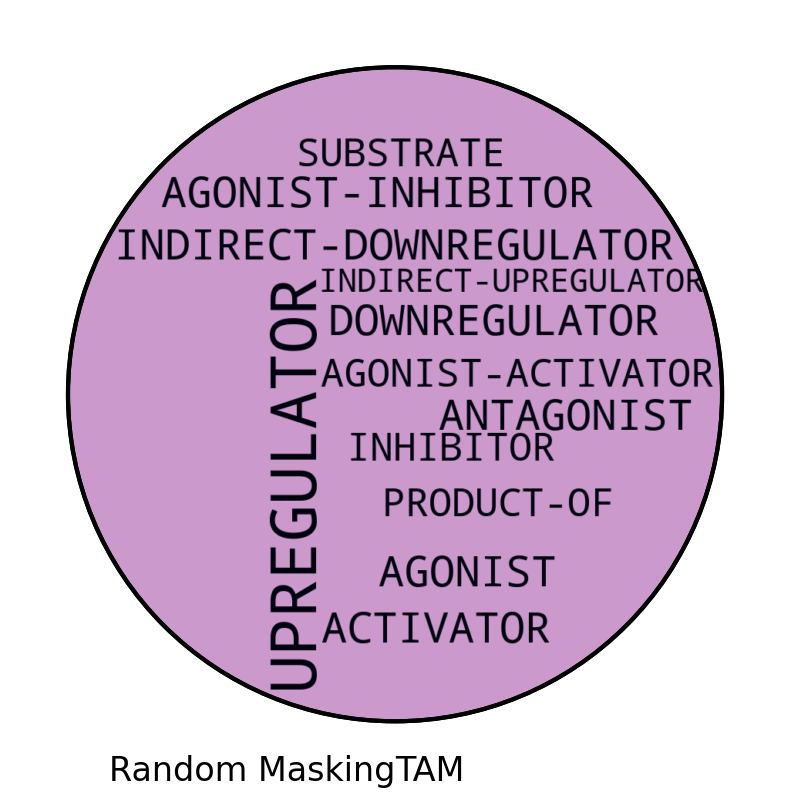

In [39]:
from matplotlib_venn_wordcloud import venn2_wordcloud
fig, ax = plt.subplots(figsize=(10,10))
# ax.set_title(‘Top 50 Cat and Dog Names in Seattle’, fontsize=20)
v = venn2_wordcloud([set(cat_t50['label']), set(dog_t50['label'])],
                    ax=ax, set_labels=['Random Masking', 'TAM'])
# add color
v.get_patch_by_id('10').set_color('red')
v.get_patch_by_id('10').set_alpha(0.4)
v.get_patch_by_id('01').set_color('blue')
v.get_patch_by_id('01').set_alpha(0.4)
v.get_patch_by_id('11').set_color('purple')
v.get_patch_by_id('11').set_alpha(0.4)

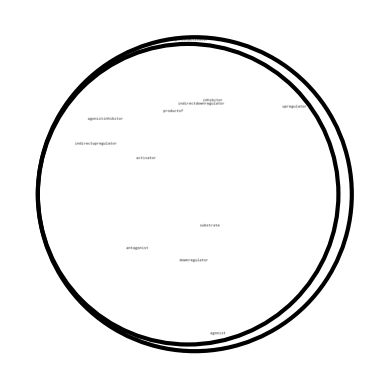

In [50]:
test_string_1 = "Lorem ipsum dolor sit amet, consetetur sadipscing elitr, sed diam nonumy eirmod tempor invidunt ut labore et dolore magna aliquyam erat, sed diam voluptua."

test_string_2 = "At vero eos et accusam et justo duo dolores et ea rebum. Stet clita kasd gubergren, no sea takimata sanctus est Lorem ipsum dolor sit amet."

# tokenize words (approximately at least):
sets = []
for string in [rand_mask, tam]:

    # get a word list
    words = string.split(' ')

    # remove non alphanumeric characters
    words = [''.join(ch for ch in word if ch.isalnum()) for word in words]

    # convert to all lower case
    words = [word.lower() for word in words]

    sets.append(set(words))

# create visualisation
venn2_wordcloud(sets)

In [49]:
rand_mask = ""

for l, c in zip(cat_t50['label'], cat_t50['count']):
    for i in range(c):
        rand_mask += (" "+l)
        
rand_mask = rand_mask.strip()

tam = ""

for l, c in zip(dog_t50['label'], dog_t50['count']):
    for i in range(c):
        tam += (" "+l)
        
tam = tam.strip()

'ANTAGONIST ANTAGONIST ANTAGONIST ANTAGONIST ANTAGONIST ANTAGONIST ANTAGONIST ANTAGONIST ANTAGONIST ANTAGONIST ANTAGONIST ANTAGONIST ANTAGONIST ANTAGONIST ANTAGONIST ANTAGONIST ANTAGONIST ANTAGONIST ANTAGONIST ANTAGONIST ANTAGONIST ANTAGONIST ANTAGONIST ANTAGONIST ANTAGONIST ANTAGONIST ANTAGONIST ANTAGONIST ANTAGONIST ANTAGONIST ANTAGONIST ANTAGONIST ANTAGONIST ANTAGONIST ANTAGONIST ANTAGONIST ANTAGONIST ANTAGONIST ANTAGONIST ANTAGONIST ANTAGONIST ANTAGONIST ANTAGONIST ANTAGONIST ANTAGONIST ANTAGONIST ANTAGONIST ANTAGONIST ANTAGONIST ANTAGONIST ANTAGONIST ANTAGONIST ANTAGONIST ANTAGONIST ANTAGONIST ANTAGONIST ANTAGONIST ANTAGONIST ANTAGONIST ANTAGONIST ANTAGONIST ANTAGONIST ANTAGONIST ANTAGONIST ANTAGONIST ANTAGONIST ANTAGONIST ANTAGONIST ANTAGONIST ANTAGONIST ANTAGONIST ANTAGONIST ANTAGONIST ANTAGONIST ANTAGONIST ANTAGONIST ANTAGONIST ANTAGONIST ANTAGONIST ANTAGONIST ANTAGONIST ANTAGONIST ANTAGONIST ANTAGONIST ANTAGONIST ANTAGONIST ANTAGONIST ANTAGONIST ANTAGONIST ANTAGONIST ANTAGONIS